# **Data preprocessing**

In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# load data
trained = pd.read_csv('data/train_full.csv', encoding = "ISO-8859-1", engine="python")
test = pd.read_csv('data/dev_full.csv',  encoding = "ISO-8859-1", engine="python")

In [3]:
trained.head()

,sentiment,tweet_id,tweet
0,neg,1,@bullyosullivan oh no! so sorry about your pet...
1,neg,2,@anneaam you should! i love prison break.i onl...
2,neg,3,i saw some really nice pair of shoess.. couldn...
3,neg,4,hihihi i had fun but my foot is still hurting!...
4,neg,5,sourish limbs is preventing me from gg out on ...


## **Check Null Values**

In [4]:
# check null values
print(np.sum(trained.isnull().any(axis=1)))
print(np.sum(test.isnull().any(axis=1)))

0
0


## **Tweets Cleaning**

In [5]:
trained = trained[['tweet', 'sentiment']]
test = test[['tweet', 'sentiment']]

### **Convert to Lower Case**

In [6]:
trained['tweet'] = trained['tweet'].str.lower()
test['tweet'] = test['tweet'].str.lower()

In [7]:
trained.head()

,tweet,sentiment
0,@bullyosullivan oh no! so sorry about your pet...,neg
1,@anneaam you should! i love prison break.i onl...,neg
2,i saw some really nice pair of shoess.. couldn...,neg
3,hihihi i had fun but my foot is still hurting!...,neg
4,sourish limbs is preventing me from gg out on ...,neg


### **Remove Tweet UserName @username**

In [8]:
import re
def clean_email(data):
    return re.sub('@[^\s]+', ' ', data)

trained['tweet']= trained['tweet'].apply(lambda x: clean_email(x))
test['tweet']= test['tweet'].apply(lambda x: clean_email(x))

In [9]:
#Training Data
trained['tweet'] = trained['tweet'].str.replace("[^a-zA-Z#]", " ")
trained['tweet'] = trained['tweet'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '')
trained['tweet'] = trained['tweet'].str.replace('@[A-Za-z0-9]+', '') 
trained['tweet'] = trained['tweet'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '')


#Test Data
test['tweet'] = test['tweet'].str.replace("[^a-zA-Z#]", " ")
test['tweet'] = test['tweet'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '') 
test['tweet'] = test['tweet'].str.replace('@[A-Za-z0-9]+', '') 
test['tweet'] = test['tweet'].str.replace(r'\B#\w*[a-zA-Z]+\w*', '') 
test['tweet'] = test['tweet'].str.replace('\d+', '')

/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_9731/3842350361.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  trained['tweet'] = trained['tweet'].str.replace("[^a-zA-Z#]", " ")
/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_9731/3842350361.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  trained['tweet'] = trained['tweet'].str.replace(r'http?://[^\s<>"]+|www\.[^\s<>"]+', '')
/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_9731/3842350361.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  trained['tweet'] = trained['tweet'].str.replace('@[A-Za-z0-9]+', '')
/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_9731/3842350361.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  trained['tweet'] = trained['tweet'].str.replace(r'\B#\w*[a-zA-Z]+\w

### **Remove Special Characters**

In [10]:
special_chars = ["!",'"',"%","&","amp","'","(",")", "*","+",",","-",".",
                 "/",":",";","<","=",">","?","[","\\","]","^","_",
                 "`","{","|","}","~","–","@","#","$"]

for c in special_chars:
    trained['tweet'] = trained['tweet'].str.replace(c,'') 

for c in special_chars:
    test['tweet'] = test['tweet'].str.replace(c,'') 

/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_9731/3268297942.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  trained['tweet'] = trained['tweet'].str.replace(c,'')
/var/folders/xl/l07cxwy94pgcqqp6n3npqbt80000gn/T/ipykernel_9731/3268297942.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['tweet'] = test['tweet'].str.replace(c,'')


### **Remove Stopwords**

In [11]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

def clean_stopwords(tweet):
    return " ".join([word for word in str(tweet).split() if word not in STOPWORDS])

trained['tweet'] = trained['tweet'].apply(lambda tweet: clean_stopwords(tweet))
test['tweet'] = test['tweet'].apply(lambda tweet: clean_stopwords(tweet))


[nltk_data] Downloading package stopwords to /Users/sw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
trained.head()

,tweet,sentiment
0,oh sorry pets,neg
1,love prison break till ep,neg
2,saw really nice pair shoess couldnt afford em,neg
3,hihihi fun foot still hurting killing,neg
4,sourish limbs preventing gg friday happy v lon...,neg


### **Remove Punctuations**

In [13]:
import string 
punctuations_list = string.punctuation

def clean_punctuations(tweet):
    translator = str.maketrans('', '', punctuations_list)
    return tweet.translate(translator)

trained['tweet']= trained['tweet'].apply(lambda x: clean_punctuations(x))
test['tweet']= test['tweet'].apply(lambda x: clean_punctuations(x))

In [14]:
trained.head()

,tweet,sentiment
0,oh sorry pets,neg
1,love prison break till ep,neg
2,saw really nice pair shoess couldnt afford em,neg
3,hihihi fun foot still hurting killing,neg
4,sourish limbs preventing gg friday happy v lon...,neg


### **Remove URL**

In [15]:
def clean_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

trained['tweet']= trained['tweet'].apply(lambda x: clean_URLs(x))
test['tweet']= test['tweet'].apply(lambda x: clean_URLs(x))

In [16]:
trained.head()

,tweet,sentiment
0,oh sorry pets,neg
1,love prison break till ep,neg
2,saw really nice pair shoess couldnt afford em,neg
3,hihihi fun foot still hurting killing,neg
4,sourish limbs preventing gg friday happy v lon...,neg


### **Remove Numbers**

In [17]:
def clean_numbers(data):
    return re.sub('[0-9]+', '', data)

trained['tweet']= trained['tweet'].apply(lambda x: clean_numbers(x))
test['tweet']= test['tweet'].apply(lambda x: clean_numbers(x))

### **Tokenizer**

In [18]:
from nltk.tokenize import RegexpTokenizer

tokenizer1 = RegexpTokenizer(r'\w+')
tokenizer2 = RegexpTokenizer(r'\w+')

trained['tweet'] = trained['tweet'].apply(tokenizer1.tokenize)
test['tweet'] = test['tweet'].apply(tokenizer2.tokenize)

### **Remove Non-Enligsh Word**

In [19]:
import enchant
def clean_non_english_word(tweet):
    d = enchant.Dict("en_US")
    new_tweet = []
    for i in tweet:
        if d.check(i):
            new_tweet.append(i)
    return new_tweet

trained['tweet'] = trained['tweet'].apply(lambda x: clean_non_english_word(x))
test['tweet'] = test['tweet'].apply(lambda x: clean_non_english_word(x))

In [20]:
trained.head()

,tweet,sentiment
0,"[oh, sorry, pets]",neg
1,"[love, prison, break, till]",neg
2,"[saw, really, nice, pair, afford, em]",neg
3,"[fun, foot, still, hurting, killing]",neg
4,"[sourish, limbs, preventing, happy, v, long, t...",neg


### **Apply Stemming**

In [21]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
def stemming(tweet):
    tweet = [st.stem(word) for word in tweet]
    return tweet

trained['tweet'] = trained['tweet'].apply(lambda x: stemming(x))
test['tweet'] = test['tweet'].apply(lambda x: stemming(x))

In [22]:
trained.head()

,tweet,sentiment
0,"[oh, sorri, pet]",neg
1,"[love, prison, break, till]",neg
2,"[saw, realli, nice, pair, afford, em]",neg
3,"[fun, foot, still, hurt, kill]",neg
4,"[sourish, limb, prevent, happi, v, long, time,...",neg


### **Apply Lemmatization**

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer 

def lemmatize(tweet):
    wnl = WordNetLemmatizer()
    tweet = [wnl.lemmatize(word) for word in tweet]
    return tweet

trained['tweet'] = trained['tweet'].apply(lambda x: lemmatize(x))
test['tweet'] = test['tweet'].apply(lambda x: lemmatize(x))

In [24]:
trained.head()

,tweet,sentiment
0,"[oh, sorri, pet]",neg
1,"[love, prison, break, till]",neg
2,"[saw, realli, nice, pair, afford, em]",neg
3,"[fun, foot, still, hurt, kill]",neg
4,"[sourish, limb, prevent, happi, v, long, time,...",neg


# **Data Visualization**

In [25]:
trained['tweet'] = trained['tweet'].apply(lambda x: ' '.join(x))
test['tweet'] = test['tweet'].apply(lambda x: ' '.join(x))


data = trained.append(test)
data = data.set_index(np.arange(len(data)))


pos_data = data[data['sentiment']=='pos']
neu_data = data[data['sentiment']=='neu']
neg_data = data[data['sentiment']=='neg']

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
data_frequency = vectorizer.fit_transform(data['tweet'])

# Summall frequenies for each word in all data
sum_frequencies = np.sum(data_frequency , axis=0)
frequency = np.squeeze(np.asarray(sum_frequencies))
frequency_df = pd.DataFrame([frequency], columns=vectorizer.get_feature_names()).transpose()
frequency_df = frequency_df.sort_values(0, ascending=False)

In [27]:
pos_vectorizer = CountVectorizer()
X_pos = pos_vectorizer.fit_transform(pos_data['tweet'])

# Sum all frequenies for word in positive tweet
pos_sum_frequencies = np.sum(X_pos, axis=0)
pos_frequency = np.squeeze(np.asarray(pos_sum_frequencies))
pos_frequency_df = pd.DataFrame([pos_frequency], columns=pos_vectorizer.get_feature_names()).transpose()
pos_frequency_df = pos_frequency_df.sort_values(0, ascending=False)

In [28]:
neu_vectorizer = CountVectorizer()
X_neu = neu_vectorizer.fit_transform(neu_data['tweet'])

# Sum all frequenies for word in neutral tweet
neu_sum_frequencies = np.sum(X_neu, axis=0)
neu_frequency = np.squeeze(np.asarray(neu_sum_frequencies))
neu_frequency_df = pd.DataFrame([neu_frequency], columns=neu_vectorizer.get_feature_names()).transpose()
neu_frequency_df = neu_frequency_df.sort_values(0, ascending=False)

In [29]:
neg_vectorizer = CountVectorizer()
X_neg = neg_vectorizer.fit_transform(neg_data['tweet'])

# Sum all frequenies for word in negative tweet
neg_sum_frequencies = np.sum(X_neg, axis=0)
neg_frequency = np.squeeze(np.asarray(neg_sum_frequencies))
neg_frequency_df = pd.DataFrame([neg_frequency], columns=neg_vectorizer.get_feature_names()).transpose()
neg_frequency_df = neg_frequency_df.sort_values(0, ascending=False)

In [30]:
# Compare 
print('******************** 50 more frequent words in All Tweets ********************')
print(frequency_df[:50].index)
print('****************** 50 more frequent words in Positive Tweets ******************')
print(pos_frequency_df[:50].index)
print('****************** 50 more frequent words in Neutral Tweets ******************')
print(neu_frequency_df[:50].index)
print('****************** 50 more frequent words in Negative Tweets ******************')
print(neg_frequency_df[:50].index)

******************** 50 more frequent words in All Tweets ********************
Index(['go', 'get', 'day', 'like', 'good', 'work', 'love', 'quot', 'today',
       'new', 'time', 'got', 'one', 'want', 'back', 'know', 'see', 'think',
       'watch', 'miss', 'thank', 'realli', 'feel', 'night', 'need', 'make',
       'hope', 'look', 'still', 'come', 'well', 'home', 'last', 'oh', 'much',
       'tomorrow', 'wish', 'week', 'twitter', 'morn', 'great', 'wait', 'sleep',
       'tri', 'take', 'follow', 'sad', 'would', 'fun', 'thing'],
      dtype='object')
****************** 50 more frequent words in Positive Tweets ******************
Index(['go', 'love', 'good', 'day', 'get', 'quot', 'thank', 'like', 'time',
       'see', 'today', 'work', 'got', 'one', 'know', 'think', 'new', 'great',
       'hope', 'night', 'watch', 'well', 'back', 'look', 'make', 'come',
       'twitter', 'realli', 'follow', 'happi', 'wait', 'fun', 'morn', 'much',
       'want', 'oh', 'need', 'nice', 'home', 'feel', 'tomorrow'

## **Most frequently 50 words in all data**

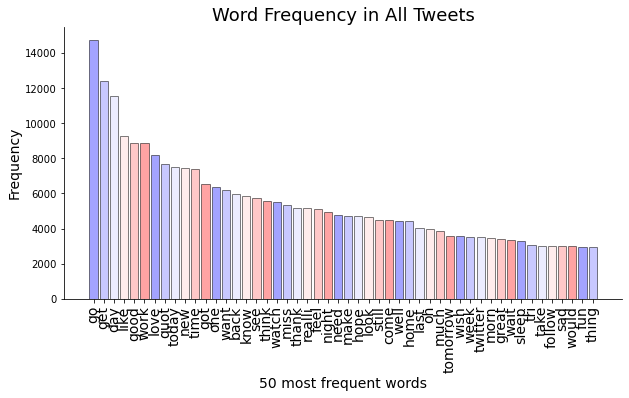

In [33]:
import seaborn as sns
word_cnt = frequency_df[0][:50].index
title = "Word Frequency in All Tweets"
plt.figure(figsize=(10,5))
plt.bar(np.arange(50), frequency_df[0][:50], width=0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
plt.xticks(np.arange(50), word_cnt, rotation=90, size=14);
plt.xlabel("50 most frequent words", size=14);
plt.ylabel("Frequency", size=14);
plt.title(title, size=18)
plt.grid(False);
plt.gca().spines["top"].set_visible(False);
plt.gca().spines["right"].set_visible(False);
plt.savefig('output-images/Raw/50-most-frequent-words-All.png', dpi=300)
plt.show() 

## **Most Frequently 50 words in Positive Tweets**

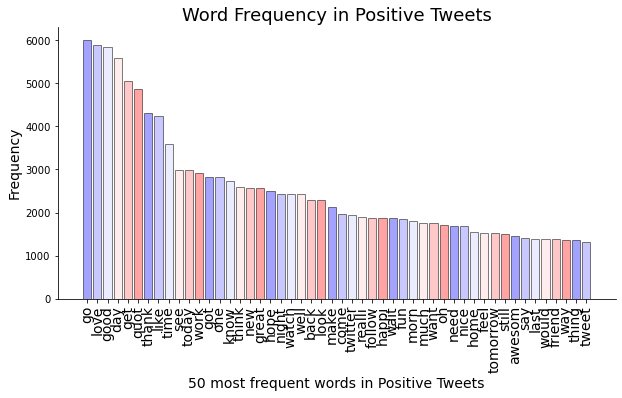

In [34]:
pos_word_cnt = pos_frequency_df[0][:50].index
title = "Word Frequency in Positive Tweets"
plt.figure(figsize=(10,5))
plt.bar(np.arange(50), pos_frequency_df[0][:50], width=0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
plt.xticks(np.arange(50), pos_word_cnt, rotation=90, size=14);
plt.xlabel("50 most frequent words in Positive Tweets", size=14);
plt.ylabel("Frequency", size=14);
plt.title(title, size=18)
plt.grid(False);
plt.gca().spines["top"].set_visible(False);
plt.gca().spines["right"].set_visible(False);
plt.savefig('output-images/Raw/50-most-frequent-words-in-positive-tweet.png', dpi=300)
plt.show() 

## **Most Frequently 50 Words in Neutral Tweets**

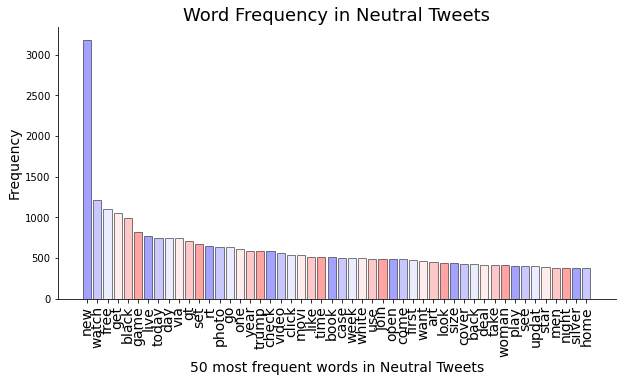

In [35]:
neu_word_cnt = neu_frequency_df[0][:50].index
title = "Word Frequency in Neutral Tweets"
plt.figure(figsize=(10,5))
plt.bar(np.arange(50), neu_frequency_df[0][:50], width=0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
plt.xticks(np.arange(50), neu_word_cnt, rotation=90, size=14);
plt.xlabel("50 most frequent words in Neutral Tweets", size=14);
plt.ylabel("Frequency", size=14);
plt.title(title, size=18)
plt.grid(False);
plt.gca().spines["top"].set_visible(False);
plt.gca().spines["right"].set_visible(False);
plt.savefig('output-images/Raw/50-most-frequent-words-in-neutral-tweet.png', dpi=300)
plt.show() 

## **Most Frequently 50 Words in Negative Tweets**

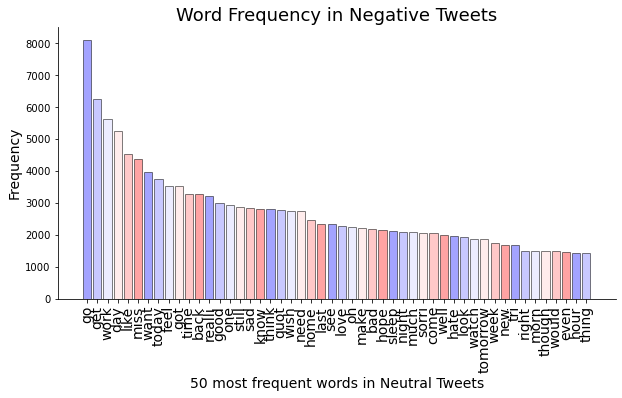

In [36]:
neg_word_cnt = neg_frequency_df[0][:50].index
title = "Word Frequency in Negative Tweets"
plt.figure(figsize=(10,5))
plt.bar(np.arange(50), neg_frequency_df[0][:50], width=0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
plt.xticks(np.arange(50), neg_word_cnt, rotation=90, size=14);
plt.xlabel("50 most frequent words in Neutral Tweets", size=14);
plt.ylabel("Frequency", size=14);
plt.title(title, size=18)
plt.grid(False);
plt.gca().spines["top"].set_visible(False);
plt.gca().spines["right"].set_visible(False);
plt.savefig('output-images/Raw/50-most-frequent-words-in-negative-tweet.png', dpi=300)
plt.show() 

## **Sentiment Distribution Pine Chart in All Data**

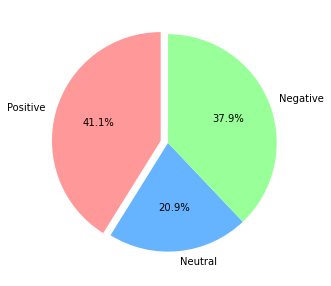

In [37]:
data_pos_amt = data['sentiment'].tolist().count('pos')
data_neu_amt = data['sentiment'].tolist().count('neu')
data_neg_amt = trained['sentiment'].tolist().count('neg')

sizes = [data_pos_amt, data_neu_amt, data_neg_amt]
explode = (0.07, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
labels = ['Positive', 'Neutral', 'Negative']
plt.figure(figsize=(5,5), facecolor='w')
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.savefig('output-images/Raw/Sentiment-Distribution-All.png', dpi=300)
plt.show()

# **Feature Extraction**

## **Training and Testing Set Preparation**

In [38]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

X = data.tweet
y = data.sentiment

# Extact 5000 feature word for each tweet
max_len = 5000
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)

In [39]:
sequences_matrix.shape

(179159, 5000)

In [40]:
# 70% tweets used in training set
# 30% tweets used in testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

###  **Check Bias**

In [41]:
train_pos_amt = y_train.tolist().count('pos')
train_neu_amt = y_train.tolist().count('neu')
train_neg_amt = y_train.tolist().count('neg')

test_pos_amt = y_test.tolist().count('pos')
test_neu_amt = y_test.tolist().count('neu')
test_neg_amt = y_test.tolist().count('neg')

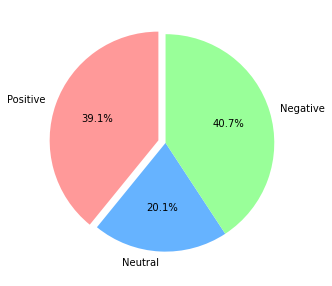

In [42]:
train_sizes = [train_pos_amt, train_neu_amt, train_neg_amt]
explode = (0.07, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
labels = ['Positive', 'Neutral', 'Negative']
plt.figure(figsize=(5,5), facecolor='w')
plt.pie(train_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.savefig('output-images/Raw/Sentiment-Distribution-Train.png', dpi=300)
plt.show()

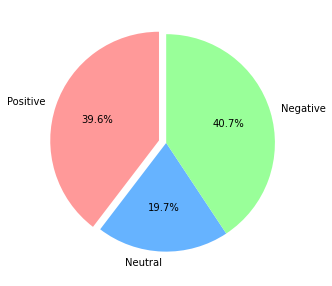

In [43]:
test_sizes = [test_pos_amt, test_neu_amt, test_neg_amt]
explode = (0.07, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99']
labels = ['Positive', 'Neutral', 'Negative']
plt.figure(figsize=(5,5), facecolor='w')
plt.pie(test_sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.savefig('output-images/Raw/Sentiment-Distribution-Test.png', dpi=300)
plt.show()

In [44]:
y_train.head()

96605     pos
142013    neg
63889     pos
99007     neg
84763     neu
Name: sentiment, dtype: object

In [45]:
from sklearn.preprocessing import LabelEncoder

train_encoder = LabelEncoder()
y_train = train_encoder.fit_transform(y_train)

test_encoder = LabelEncoder()
y_test = test_encoder.fit_transform(y_test)

# **Neural Network**

## **Build Neural Network Model**

In [46]:
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model

In [47]:
def nn_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(2000,50,input_length=max_len)(inputs) 
    layer = LSTM(64)(layer) 
    layer = Dense(256,name='FC1')(layer) 
    layer = Activation('relu')(layer) 
    layer = Dropout(0.5)(layer) 
    layer = Dense(1,name='out_layer')(layer) 
    layer = Activation('sigmoid')(layer) 
    model = Model(inputs=inputs,outputs=layer) 
    return model 

## **Model Compilation**

In [48]:
from tensorflow.keras.optimizers import RMSprop
model = nn_model() 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])  

2021-12-24 23:16:09.590885: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [49]:
hists = model.fit(X_train,y_train,batch_size=80,epochs=6, validation_split=0.1)
print('************* Training Finished *************')


Epoch 1/6
1411/1411 [==============================] - 38459s 27s/step - loss: 0.0000e+00 - accuracy: 0.4093 - val_loss: 0.0000e+00 - val_accuracy: 0.4432
Epoch 2/6
 225/1411 [===>..........................] - ETA: 1:16:52 - loss: 0.0000e+00 - accuracy: 0.4452